# Periodic Extensions

Some aperiodic functions can be "periodically extended", either oddly or evenly, to create periodic (and hopefully smooth, but not always) functions (of twice the length), which can then be spectrally differentiated with the Fourier basis. This notebook demonstrates how to do this, expositing examples where this workaround is possible, in case you prefer to use the Fourier basis for whatever reason, e.g. to allow algebraic manipulation of differential equations post transform, which [often isn't possible with the Chebyshev transform](https://github.com/pavelkomarov/spectral-derivatives/issues/11), or more intuitive noise filtration, because [filtering in the Chebyshev basis doesn't separate frequencies as well](https://github.com/pavelkomarov/spectral-derivatives/issues/14).

In [1]:
import sys; sys.path.append('../specderiv') # so I can import specderiv code from a neighboring working directory
from specderiv import fourier_deriv
import numpy as np
from matplotlib import pyplot

## Odd Extension

For this we'll use the example function $\sin(\frac{3\theta}{2})$ on $\theta \in [0, 2\pi)$. If we were to naively join copies of this function end-to-end, then the ends don't match up smoothly, and we get a Gibbs phenomenon in the reconstruction, which makes derivatives hopelessly inaccurate. But if we join the function end-to-end with a negated copy of itself, then we get something periodic.

In [2]:
M = 20 # length M, in keeping with the usage of M in my math.pdf notes.

th_n = np.linspace(0, 2*np.pi, M, endpoint=False) # It's important this be an *open* periodic domain, or we get artefacting
th_n_ext = np.linspace(0, 4*np.pi, 2*M, endpoint=False)
th = np.linspace(0, 2*np.pi, 100, endpoint=False) # A denser set of points over the domain, for plotting
th_ext = np.linspace(0, 4*np.pi, 200, endpoint=False)

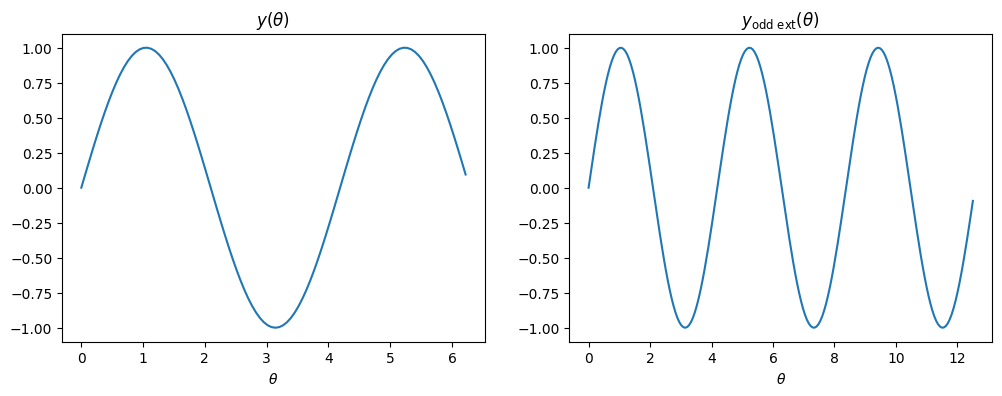

In [3]:
y = np.sin(3*th/2)
y_ext = np.concatenate((y, -y)) # periodically extend the function by tacking on its negative

fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(th, y)
axes[0].set_title(r"$y(\theta)$")
axes[0].set_xlabel(r"$\theta$")
axes[1].plot(th_ext, y_ext)
axes[1].set_title(r"$y_{\text{odd ext}}(\theta)$")
axes[1].set_xlabel(r"$\theta$");

Now if we take a spectral derivative of the latter, then we can see the first half matches up with the true derivatives perfectly.

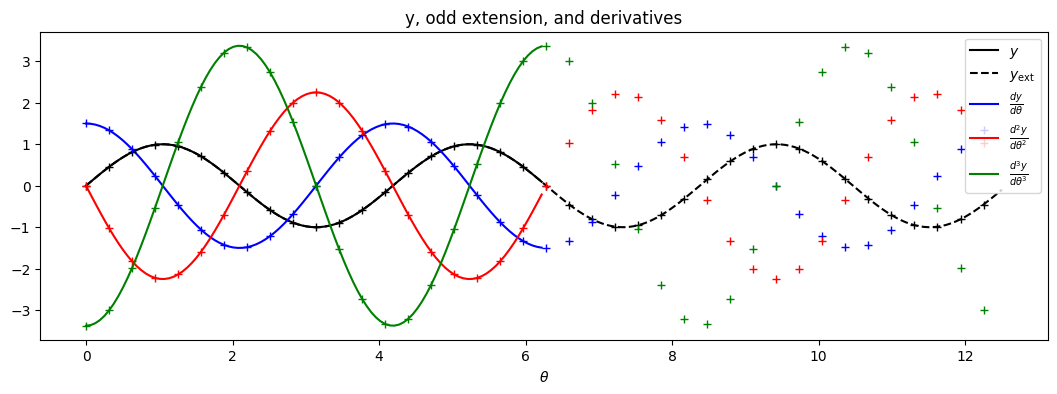

In [4]:
dy = 3/2 * np.cos(3*th/2) # analytic derivatives
d2y = -9/4 * np.sin(3*th/2)
d3y = -27/8 * np.cos(3*th/2)

pyplot.figure(figsize=(13,4))
pyplot.plot(th, y, 'k', label=r"$y$")
pyplot.plot(th_ext, y_ext, 'k--', label=r"$y_{\text{ext}}$")
pyplot.plot(th, dy, 'b', label=r"$\frac{dy}{d\theta}$")
pyplot.plot(th, d2y, 'r', label=r"$\frac{d^2y}{d\theta^2}$")
pyplot.plot(th, d3y, 'g', label=r"$\frac{d^3y}{d\theta^3}$")
pyplot.title("y, odd extension, and derivatives")
pyplot.xlabel(r'$\theta$')
pyplot.legend()

# sampled function and computed derivatives
y_n =  np.sin(3*th_n/2)
y_n_ext = np.concatenate((y_n, -y_n))
dy_n_ext = fourier_deriv(y_n_ext, th_n_ext, 1)
d2y_n_ext = fourier_deriv(y_n_ext, th_n_ext, 2)
d3y_n_ext = fourier_deriv(y_n_ext, th_n_ext, 3)

pyplot.plot(th_n_ext, y_n_ext, 'k+')
pyplot.plot(th_n_ext, dy_n_ext, 'b+')
pyplot.plot(th_n_ext, d2y_n_ext, 'r+')
pyplot.plot(th_n_ext, d3y_n_ext, 'g+');

This works because the periodic extension lines up smoothly at the ends. Compare this with "The Subtle Aperiodic Case" in [the Fourier notebook](https://github.com/pavelkomarov/spectral-derivatives/blob/main/notebooks/fourier.ipynb).

## Even Extension

We'll use the function $\frac{1}{1 + e^{-\theta}}$ on $\theta \in [a, b); a < 0; b > 0$. This *doesn't* quite match up slope-wise when we flip and join, so we'll see *some* Gibbs phenomenon, but as we take $a$ and $b$ larger, the funtion flattens out, and we'll see pretty good agreement, even in the higher derivatives.

In [5]:
a = -5
b = -a

th_n = np.linspace(a, b, M, endpoint=False)
th_n_ext = np.linspace(a, b + (b-a), 2*M, endpoint=False) # [a, b) + [b, a) = 2M points
th = np.linspace(a, b, 100, endpoint=False) # A denser set of points over the domain, for plotting
th_ext = np.linspace(a, b + (b-a), 200, endpoint=False)

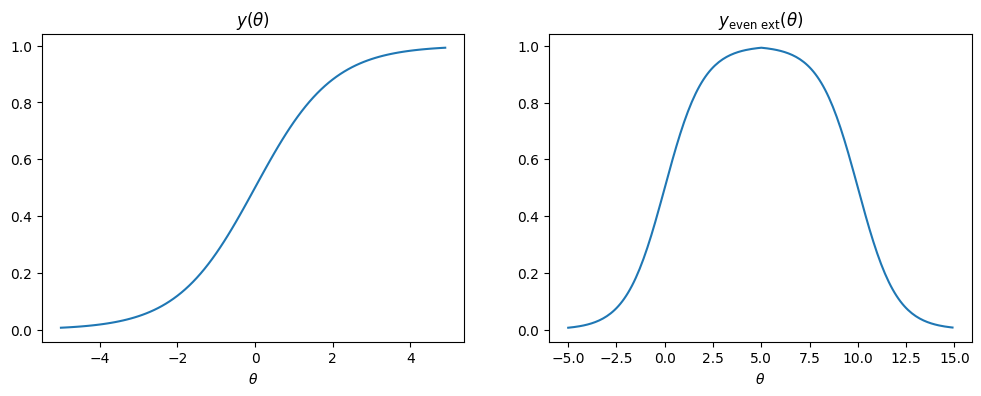

In [6]:
y = 1/(1 + np.exp(-th))
y_ext = np.concatenate((y, [1/(1 + np.exp(-b))], y[:0:-1])) # periodically extend the function by tacking on its reversal, with y(b) between

fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(th, y)
axes[0].set_title(r"$y(\theta)$")
axes[0].set_xlabel(r"$\theta$")
axes[1].plot(th_ext, y_ext)
axes[1].set_title(r"$y_{\text{even ext}}(\theta)$")
axes[1].set_xlabel(r"$\theta$");

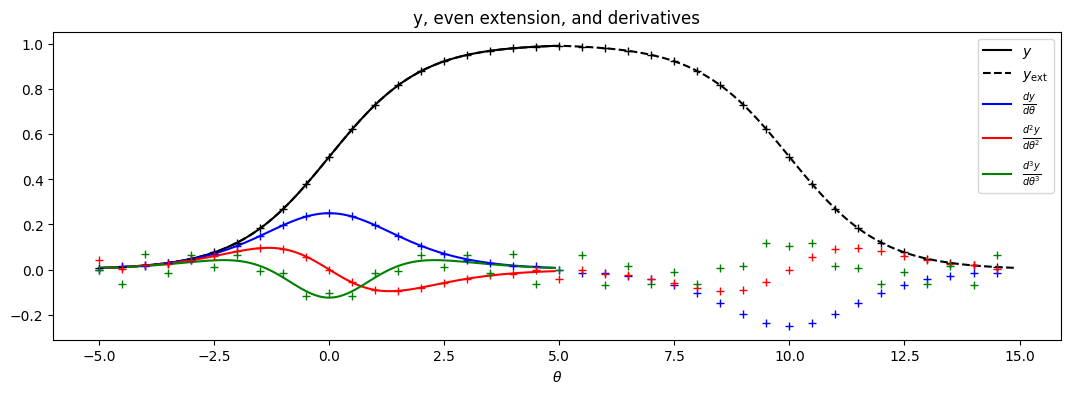

In [7]:
dy = np.exp(-th) / (1 + np.exp(-th))**2 # analytic derivatives
d2y = 2*np.exp(-2*th) / (1 + np.exp(-th))**3 - np.exp(-th) / (1 + np.exp(-th))**2
d3y = np.exp(-th) / (1 + np.exp(-th))**2 - 6*np.exp(-2*th) / (1 + np.exp(-th))**3 + 6*np.exp(-3*th) / (1 + np.exp(-th))**4

pyplot.figure(figsize=(13,4))
pyplot.plot(th, y, 'k', label=r"$y$")
pyplot.plot(th_ext, y_ext, 'k--', label=r"$y_{\text{ext}}$")
pyplot.plot(th, dy, 'b', label=r"$\frac{dy}{d\theta}$")
pyplot.plot(th, d2y, 'r', label=r"$\frac{d^2y}{d\theta^2}$")
pyplot.plot(th, d3y, 'g', label=r"$\frac{d^3y}{d\theta^3}$")
pyplot.title("y, even extension, and derivatives")
pyplot.xlabel(r'$\theta$')
pyplot.legend()

# sampled function and computed derivatives
y_n = 1/(1 + np.exp(-th_n))
y_n_ext = np.concatenate((y_n, [1/(1 + np.exp(-b))], y_n[:0:-1]))
dy_n_ext = fourier_deriv(y_n_ext, th_n_ext, 1)
d2y_n_ext = fourier_deriv(y_n_ext, th_n_ext, 2)
d3y_n_ext = fourier_deriv(y_n_ext, th_n_ext, 3)

pyplot.plot(th_n_ext, y_n_ext, 'k+')
pyplot.plot(th_n_ext, dy_n_ext, 'b+')
pyplot.plot(th_n_ext, d2y_n_ext, 'r+')
pyplot.plot(th_n_ext, d3y_n_ext, 'g+');

We can see it's working very well up until the second derivative and only starts to really break down at the third. That subtle corner causes trouble. 

Compare this with the not extended version, where Gibbs phenomenon completely overwhelms the answer:

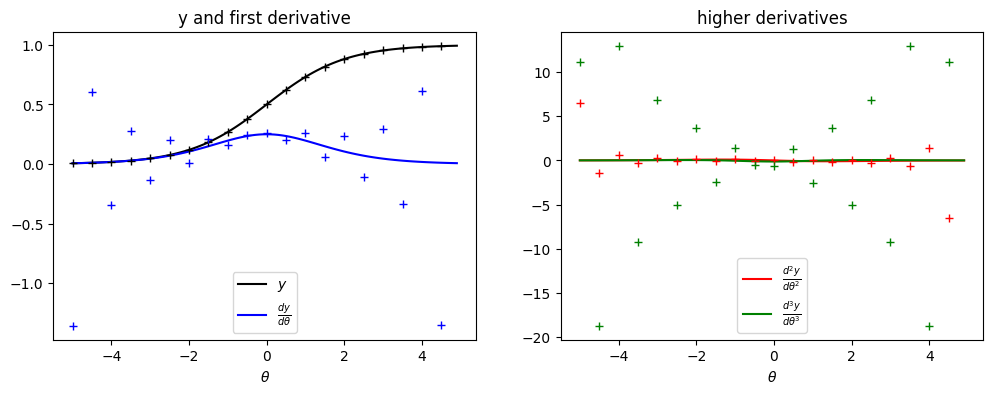

In [8]:
fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(th, y, 'k', label=r"$y$")
axes[0].plot(th, dy, 'b', label=r"$\frac{dy}{d\theta}$")
axes[0].set_title("y and first derivative")
axes[0].set_xlabel(r'$\theta$')
axes[0].legend()
axes[1].plot(th, d2y, 'r', label=r"$\frac{d^2y}{d\theta^2}$")
axes[1].plot(th, d3y, 'g', label=r"$\frac{d^3y}{d\theta^3}$")
axes[1].set_title("higher derivatives")
axes[1].set_xlabel(r'$\theta$')
axes[1].legend()

# sampled function and computed derivatives
dy_n = fourier_deriv(y_n, th_n, 1)
d2y_n = fourier_deriv(y_n, th_n, 2)
d3y_n = fourier_deriv(y_n, th_n, 3)

axes[0].plot(th_n, y_n, 'k+')
axes[0].plot(th_n, dy_n, 'b+')
axes[1].plot(th_n, d2y_n, 'r+')
axes[1].plot(th_n, d3y_n, 'g+');

## Even and Odd Extension Together

It's possible to break down *any* function into even and odd components:

$$ f_\text{even} = \frac{f(x) + f(-x)}{2}, \quad f_\text{odd} = \frac{f(x) - f(-x)}{2} $$
$$ f(x) = f_\text{even} + f_\text{odd} $$

The derivative operator is *linear*, so $\frac{d^\nu}{dx^\nu}f(x) = \frac{d^\nu}{dx^\nu}f_\text{even} + \frac{d^\nu}{dx^\nu}f_\text{odd}$, and if we're lucky, we may be able to find a good approximation of the righthand side via two Fourier-basis spectral derivatives.

Let's use the example function from the [Chebyshev notebook](https://github.com/pavelkomarov/spectral-derivatives/blob/main/notebooks/chebyshev.ipynb) which was explicitly shown *not* to work in the [Fourier notebook](https://github.com/pavelkomarov/spectral-derivatives/blob/main/notebooks/fourier.ipynb):

$$y(x) = e^x \sin(5x),\quad x \in [-1, 1)$$

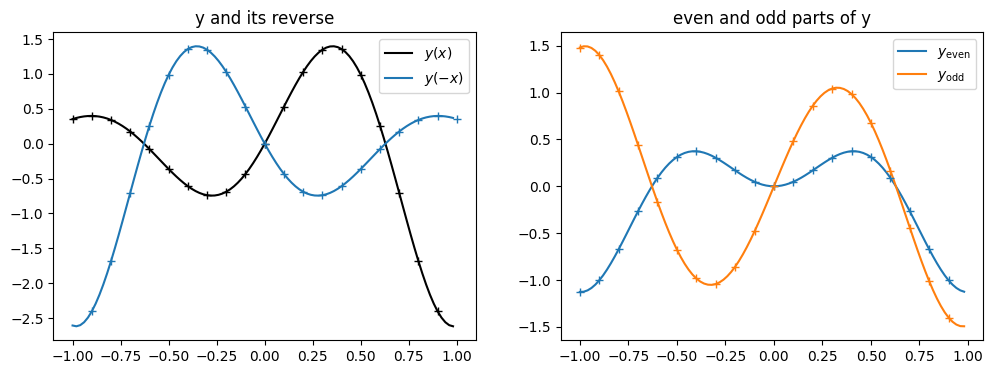

In [9]:
y = lambda x: np.exp(x) * np.sin(5*x)
y_even = lambda x: (y(x) + y(-x))/2
y_odd = lambda x: (y(x) - y(-x))/2

x = np.linspace(-1, 1, 100, endpoint=False)
x_n = np.linspace(-1, 1, M, endpoint=False) # dx = 2/M

fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(x, y(x), 'k', label=r"$y(x)$")
axes[0].plot(x, y(-x), label=r"$y(-x)$")
axes[0].plot(x_n, y(x_n), 'k+')
axes[0].plot(x_n + 2/M, y(x_n)[::-1], 'C0+')
axes[0].set_title("y and its reverse")
axes[0].legend()
axes[1].plot(x, y_even(x), label=r"$y_\text{even}$")
axes[1].plot(x, y_odd(x), label=r"$y_\text{odd}$")
axes[1].plot(x_n, y_even(x_n), 'C0+')
axes[1].plot(x_n, y_odd(x_n), 'C1+')
axes[1].set_title("even and odd parts of y")
axes[1].legend();

Notice that the $y_\text{even}$ lines up at its endpoints, as we would expect because $f(-x) = f(x)$, and $y_\text{odd}$'s endpoints are negations of each other, following $f(-x) = -f(x)$.

So if we imagine periodic copies of $y_\text{even}$, it's *almost* smooth, and if we take the even extension of $y_\text{odd}$, it's *almost* smooth too. However, these functions don't line up *perfectly*, so there are still little corners, and the Fourier basis hates those.

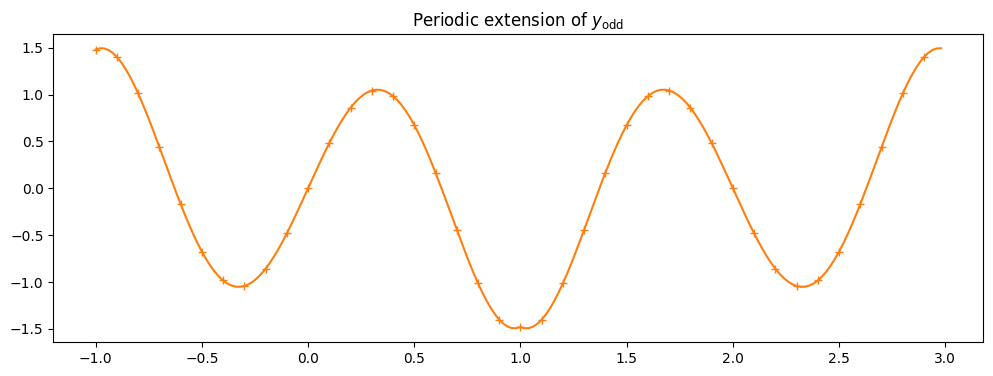

In [10]:
dy = np.exp(x) * (5*np.cos(5*x) + np.sin(5*x))
d2y = 2*np.exp(x) * (5*np.cos(5*x) - 12*np.sin(5*x))
d3y = -2*np.exp(x) * (37*np.sin(5*x) + 55*np.cos(5*x))

x_n_ext = np.linspace(-1, 3, 2*M, endpoint=False)
y_n_ext = np.concatenate((y_odd(x_n), [-y_odd(x_n[0])], y_odd(x_n)[:0:-1]))
x_ext = np.linspace(-1, 3, 200, endpoint=False)
y_ext = np.concatenate((y_odd(x), [-y_odd(x[0])], y_odd(x)[:0:-1]))
pyplot.figure(figsize=(12,4))
pyplot.plot(x_ext, y_ext, 'C1')
pyplot.plot(x_n_ext, y_n_ext, 'C1+')
pyplot.title(r"Periodic extension of $y_\text{odd}$");

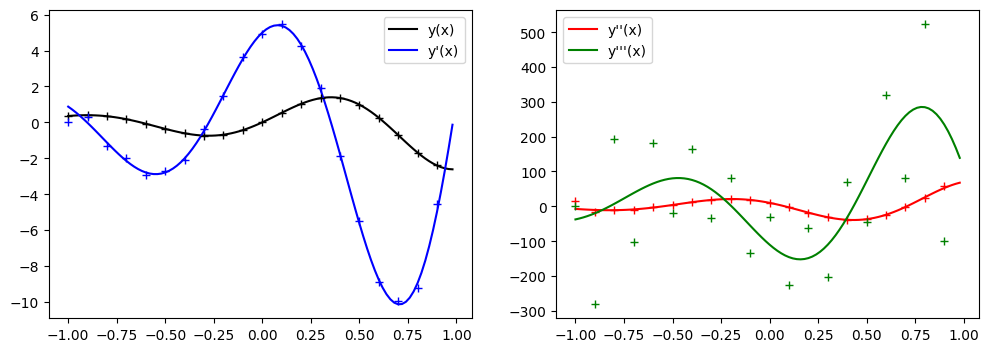

In [11]:
dy_n = fourier_deriv(y_even(x_n), x_n, 1) + fourier_deriv(y_n_ext, x_n_ext, 1)[:M]
d2y_n = fourier_deriv(y_even(x_n), x_n, 2) + fourier_deriv(y_n_ext, x_n_ext, 2)[:M]
d3y_n = fourier_deriv(y_even(x_n), x_n, 3) + fourier_deriv(y_n_ext, x_n_ext, 3)[:M]

fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(x, y(x), 'k', label="y(x)")
axes[0].plot(x, dy, 'b', label="y'(x)")
axes[0].plot(x_n, y(x_n), 'k+')
axes[0].plot(x_n, dy_n, 'b+')
axes[0].legend()
axes[1].plot(x, d2y, 'r', label="y''(x)")
axes[1].plot(x_n, d2y_n, 'r+')
axes[1].plot(x, d3y, 'g', label="y'''(x)")
axes[1].plot(x_n, d3y_n, 'g+')
axes[1].legend();

Indeed the corners are a problem, but we do quite well compared to [naive application to the aperiodic function](https://github.com/pavelkomarov/spectral-derivatives/blob/main/notebooks/fourier.ipynb). However, this only works this well because both the even and odd components happen to *almost* line up at the domain endpoints. It is possible for the even and odd components to have sharp corners at the endpoints (e.g. $e^x\sin(7x),\ x \in [-1, 1)$), in which case this method fails spectacularly. 